In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

In [2]:
from matplotlib.patches import Rectangle

class bingo_card():
    """
    class to create bingo sheets
    """
    def __init__(self, phrases=[], Ncol=5, Nrow=5, size=8, fontsize=12):
        """
        Parameters
        ----------
        phrases : list
            list of phrases to put into bing squares
        
        Ncol : int
            number of columns
        
        Nrow : int
            number of rows
        
        size : float
            size of card in inches
        """
        
        self.x0=0.05
        self.y0=0.05
        self.Lbox = 0.9
        self.Ncol = Ncol
        self.Nrow = Nrow
        self.fontsize = fontsize
        
        self.center_text='FREE'
        self.center_fontsize = 20
        self.center = [int(Ncol/2),int(Nrow/2)]
        
        Nphrases = len(phrases)
        self.phrases = phrases
        
        #draw outer box
        self.fig = plt.figure(figsize=(size,size))
        outer_square = Rectangle([self.x0,self.y0], self.Lbox , self.Lbox, facecolor="none", edgecolor="black")
        self.ax = plt.gca()
        self.ax.set_axis_off()
        self.ax.add_patch(outer_square)
        
        #create inner boxes
        self.dx = 1.0*self.Lbox/self.Ncol
        self.dy = 1.0*self.Lbox/self.Nrow
        
        #get random numbers to select phrases
        if Nphrases>=(Ncol*Nrow):
            replace=False
        else:
            replace=True
        ran_indices = np.random.choice(Nphrases, Ncol*Nrow, replace=replace)
        ran_indices = np.reshape(ran_indices,(Ncol,Nrow))
        for i in range(0,Ncol):
            for j in range(0,Nrow):
                k = ran_indices[i,j]
                self.square(i,j,k)
        
    def square(self, icol, irow, iphrase):
        """
        bingo squares
        
        Parameters
        ----------
        phrase : string
            text to put into the square
        
        icol : int
            index inidicating the column
        
        irow : int
            index inidicating the row
        """
        
        x = self.x0 + icol*self.dx
        y = self.y0 + irow*self.dy
                       
        #add text
        if [icol, irow] == self.center:
            inner_square = Rectangle([x,y], self.dx , self.dy, facecolor="black", edgecolor="black")
            self.ax.add_patch(inner_square)
            self.ax.text(x+self.dx/2.0,y+self.dy/2.0, self.center_text,
                         fontsize=self.center_fontsize, color='white', weight='heavy',
                         horizontalalignment='center',
                         verticalalignment='center')
        else:
            inner_square = Rectangle([x,y], self.dx , self.dy, facecolor="none", edgecolor="black")
            self.ax.add_patch(inner_square)
            self.ax.text(x+self.dx/2.0,y+self.dy/2.0, self.phrases[iphrase],
                         fontsize=self.fontsize,
                         horizontalalignment='center',
                         verticalalignment='center', wrap=True)
            

In [5]:
#open and process phrase sheet
fname = './bingo_items_3.txt'
with open(fname) as f:
    phrases = f.readlines()
phrases = [x.strip() for x in phrases] 
phrases = [x.replace('(new line)','\n') for x in phrases] 
print("number of phrases:",len(phrases))

number of phrases: 50


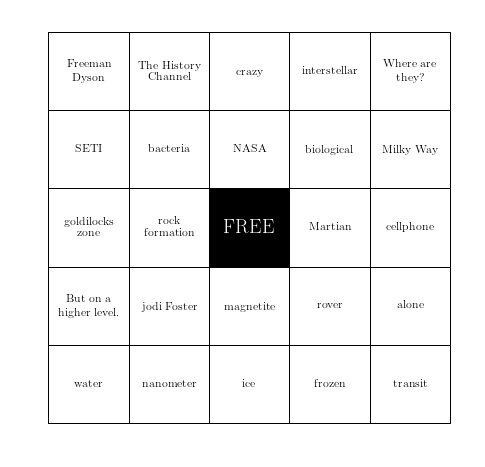

In [15]:
#create bing sheet
card = bingo_card(phrases=phrases)

In [16]:
#create random bing sheets
Ncards = 100
for i in range(0, Ncards):
    card = bingo_card(phrases=phrases)
    card.fig.savefig('./bingo_sheets_3/'+str(i)+'_sheet.pdf')
    plt.close(card.fig)